In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats.mstats import zscore

In [2]:
df_study_3 = pd.read_csv('../../Data/study4_olr_formatted.csv', delimiter=',')

In [3]:
#Get all got emotion valuation columns in separate arrays
cols = df_study_3.columns

eval_cols = [i for i in cols if len(i.split('Good'))>1]
actual_cols = [i for i in cols if len(i.split('Actual'))>1]
ideal_cols = [i for i in cols if len(i.split('Ideal'))>1]
hedonic_cols = [i for i in cols if len(i.split('Pleasant'))>1]

In [4]:
#emotion concepts for multiplte regression
emo_concepts_regression = ['Shame',
 'Fear',
 'Calm',
 'Jealousy',
 'Miserable',
 'Lust',
 'Disgust',
 'Guilt',
 'Pride',
 'Excitement',
 'Sadness',
 'Happy',
 'Love']
model_summaries = []

#run multiple regression predicting actual emotion experience from  emotion valuations
for i in range(len(emo_concepts_regression)):
    emotion = emo_concepts_regression[i]
    eval_col = emotion+ 'Good'
    ideal_col = emotion+'Ideal'
    hedonic_col = emotion + 'Pleasant'
    X = df_study_3[[eval_col,ideal_col,hedonic_col]]
    y = df_study_3[emotion+str('Actual')]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X) # make the predictions by the model

    # Print out the statistics
    model_summaries.append(model)
    

/Users/phoenix/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


## Standardized Betas

In [10]:
# full model flat

def CreateEmotionColumns(valuations_arr, emotion):
    valuation_emotion_cols = []
    for i in range(len(valuations_arr)):
        column_name =emotion + valuations_arr[i]
        valuation_emotion_cols.append(column_name)
    return valuation_emotion_cols

def LinearRegression(emotion_concepts,prediction_columns, predicted_column):
    model_summaries = []
    for i in range(len(emotion_concepts)):
        emotion = emo_concepts_regression[i]
        emotion_val_columns = CreateEmotionColumns(prediction_columns, emotion)
        emotion_val_predict = emotion + predicted_column
        X = zscore(df_study_3[emotion_val_columns])
        y = zscore(df_study_3[emotion_val_predict])
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X) # make the predictions by the model

        # Print out the statistics
        model_summaries.append(model)
    return model_summaries

## flat model

In [12]:
flat_model_summaries = LinearRegression(emo_concepts_regression, ['Good','Ideal','Pleasant'], 'Actual')

In [ ]:
## good + hedonic predict desired

In [14]:
# good + pleasant - predict desired
#desired predict actual
predict_ideal = LinearRegression(emo_concepts_regression,
                                        ['Good','Pleasant'],
                                        'Ideal')
ideal_predict_actual = LinearRegression(emo_concepts_regression,
                                        ['Ideal'],
                                        'Actual')

## Save data

In [44]:
def create_df_of_betas_3(model_summaries, emo_concepts_regression):
    P_Val_Const,P_Val_Good,P_Val_Ideal,P_Val_Pleasant = [], [], [], []
    B_Val_Const, B_Val_Good, B_Val_Ideal, B_Val_Pleasant =  [], [], [], []
    r_squared = []
    for i in range(len(emo_concepts_regression)):
        P_Val_Const.append(model_summaries[i].pvalues[0])
        P_Val_Good.append(model_summaries[i].pvalues[1])
        P_Val_Ideal.append(model_summaries[i].pvalues[2])
        P_Val_Pleasant.append(model_summaries[i].pvalues[3])
        B_Val_Const.append(model_summaries[i].params[0])
        B_Val_Good.append(model_summaries[i].params[1])
        B_Val_Ideal.append(model_summaries[i].params[2])
        B_Val_Pleasant.append(model_summaries[i].params[3])
        r_squared.append(model_summaries[i].rsquared)

    return pd.DataFrame({
        'emotion':emo_concepts_regression,
        'P_Val_Const':P_Val_Const,
        'P_Val_Good':P_Val_Good,
        'P_Val_Ideal':P_Val_Ideal,
        'P_Val_Pleasant':P_Val_Pleasant,
        'B_Val_Const':B_Val_Const,
        'B_Val_Good':B_Val_Good,
        'B_Val_Ideal':B_Val_Ideal,
        'B_Val_Pleasant':B_Val_Pleasant,
        'R_squared':r_squared
    })

def create_df_of_betas_2(model_summaries, emo_concepts_regression):
    P_Val_Const,P_Val_Good,P_Val_Pleasant = [], [], []
    B_Val_Const, B_Val_Good,B_Val_Pleasant = [], [], []
    r_squared = []
    
    for i in range(len(emo_concepts_regression)):
        P_Val_Const.append(model_summaries[i].pvalues[0])
        P_Val_Good.append(model_summaries[i].pvalues[1])
        P_Val_Pleasant.append(model_summaries[i].pvalues[2])
        B_Val_Const.append(model_summaries[i].params[0])
        B_Val_Good.append(model_summaries[i].params[1])
        B_Val_Pleasant.append(model_summaries[i].params[2])
        r_squared.append(model_summaries[i].rsquared)

    return pd.DataFrame({
        'emotion':emo_concepts_regression,
        'P_Val_Const':P_Val_Const,
        'P_Val_Good':P_Val_Good,
        'P_Val_Pleasant':P_Val_Pleasant,
        'B_Val_Const':B_Val_Const,
        'B_Val_Good':B_Val_Good,
        'B_Val_Pleasant':B_Val_Pleasant,
        'R_squared':r_squared
    }) 

def create_df_of_betas_1(model_summaries, emo_concepts_regression):
    P_Val_Const, P_Val_Ideal, B_Val_Const, B_Val_Ideal, r_squared = [],[],[],[],[]
    for i in range(len(emo_concepts_regression)):
        P_Val_Const.append(model_summaries[i].pvalues[0])
        P_Val_Ideal.append(model_summaries[i].pvalues[1])
        B_Val_Const.append(model_summaries[i].params[0])
        B_Val_Ideal.append(model_summaries[i].params[1])
        r_squared.append(model_summaries[i].rsquared)

    return pd.DataFrame({
        'emotion':emo_concepts_regression,
        'P_Val_Const':P_Val_Const,
        'P_Val_Ideal':P_Val_Ideal,
        'B_Val_Const':B_Val_Const,
        'B_Val_Ideal':B_Val_Ideal,
        'R_squared':r_squared
    }) 

In [23]:
#create_df_of_betas(model_summaries_z_scores).to_excel('../../Data/Tables/RAW/Standardized_Betas_Multiple_Regression.xlsx')

In [29]:
create_df_of_betas_1(ideal_predict_actual)

,emotion,P_Val_Const,P_Val_Ideal,B_Val_Const,B_Val_Ideal,R_squared
0,Shame,1.0,2.878868e-24,-7.122890e-17,0.711254,0.505883
1,Fear,1.0,2.440526e-22,3.787088e-17,0.689442,0.475331
2,Calm,1.0,3.108439e-11,3.277371e-17,0.509860,0.259957
3,Jealousy,1.0,3.341400e-22,9.439319e-18,0.687822,0.473100
4,Miserable,1.0,5.211645e-23,8.112720e-18,0.697252,0.486160
5,Lust,1.0,2.250729e-26,-5.233415e-17,0.732979,0.537259
6,Disgust,1.0,1.714839e-27,9.862367e-17,0.743707,0.553101
7,Guilt,1.0,2.128386e-21,2.814976e-17,0.678056,0.459760
8,Pride,1.0,4.958848e-12,1.177255e-16,0.527159,0.277897
9,Excitement,1.0,3.289602e-12,-9.439153e-17,0.530897,0.281852


In [27]:
create_df_of_betas_2(predict_ideal)

In [26]:
predict_ideal[i].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     44.76
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           6.91e-16
Time:                        13:58:52   Log-Likelihood:                -175.80
No. Observations:                 149   AIC:                             357.6
Df Residuals:                     146   BIC:                             366.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.055e-16      0.065  -4.69e-15      1.000      -0.129       0.129
x1             0.3679      0.091      4.035      0.000       0.188       0.548
x2             0.3004      0.091      3.294      0.001       0.120       0.481
==============================================================================
Omnibus:                       78.879   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.482
Skew:                          -1.911   Prob(JB):                     7.23e-85
Kurtosis:                       9.914   Cond. No.                         2.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

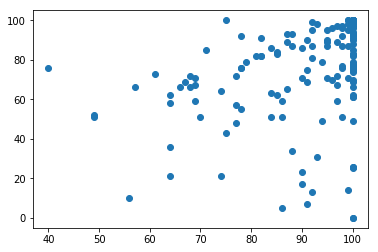

In [32]:
plt.scatter(df_study_3['LoveIdeal'],df_study_3['LoveActual'])

In [42]:
X = df_study_3['LoveIdeal']
y = df_study_3['LoveActual']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

/Users/phoenix/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [43]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.098    
Dependent Variable: LoveActual       AIC:                1371.5011
Date:               2019-07-29 16:37 BIC:                1377.5090
No. Observations:   149              Log-Likelihood:     -683.75  
Df Model:           1                F-statistic:        17.05    
Df Residuals:       147              Prob (F-statistic): 6.09e-05 
R-squared:          0.104            Scale:              574.50   
--------------------------------------------------------------------
             Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const       18.2350    13.6129   1.3395   0.1825   -8.6672   45.1372
LoveIdeal    0.6179     0.1497   4.1288   0.0001    0.3222    0.9137
------------------------------------------------------------------
Omnibus:               43.969       Durbin-Watson:          1.864 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       73.519
Skew:                  -1.482       Prob(JB):               0.000 
Kurtosis:              4.748        Condition No.:          631   
==================================================================

"""

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg = LinearRegression().fit(X, y)

In [41]:
reg.coef_

array([0.        , 0.32236075])